## Fig S10: Cost of synthesizing oligo pools of different sizes

Required packages:

In [1]:
# processing
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from tregs.mpl_pboc import plotting_style

plt.rcParams.update({'font.size': 12})
plotting_style()

fdir = '../data/'
out_fdir = '../plots/figS10/'

We load the dataframe containing the Twist cost sheet of oligo pool synthesis

In [2]:
df = pd.read_csv(fdir + 'twist.csv')
df.head()

,Tier,20 - 120nt,121 - 150nt,151 - 200nt,201 - 250nt,251 - 300nt,max_pool_size
0,Tier 1,200.0,233.0,260.0,344.5,515.0,100
1,Tier 2,400.0,466.5,520.0,689.5,1030.0,500
2,Tier 3,600.0,700.0,780.0,1034.0,1545.0,1000
3,Tier 4,800.0,933.5,1040.0,1378.5,2060.5,2000
4,Tier 5,1200.0,1400.0,1560.0,2068.0,3090.5,6000


Plotting the cost of oligo pool synthesis against the size of the oligo pool for different oligo length

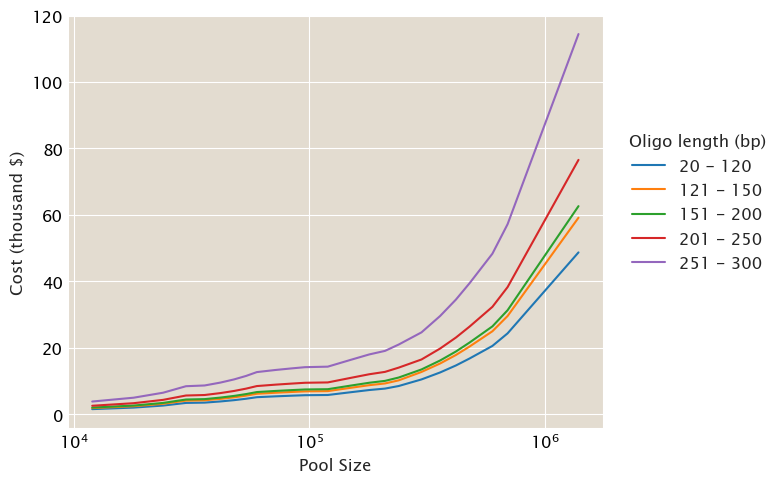

In [3]:
fig, ax = plt.subplots(figsize=(8, 5))

colors = sns.color_palette(n_colors=5)

nt_ranges = ["20 - 120nt", "121 - 150nt", "151 - 200nt", "201 - 250nt", "251 - 300nt"]
legends = ["20 - 120", "121 - 150", "151 - 200", "201 - 250", "251 - 300"]

df = df[(df["max_pool_size"] <= 2 * 1e6) & (df["max_pool_size"] >= 1e4)]
for i, nt_range in enumerate(nt_ranges):
    ax.plot(df["max_pool_size"], df[nt_range] / 1000, linestyle='-', label=legends[i],  color=colors[i])
ax.set_xscale('log')

ax.set_xlabel("Pool Size")
ax.set_ylabel("Cost (thousand $)")
legend = ax.legend(title='Oligo length (bp)', bbox_to_anchor=(1.02, 0.75))
legend.get_frame().set_linewidth(0)
legend.get_frame().set_facecolor('none') 
ax.grid(True)

plt.tight_layout()
plt.savefig(out_fdir + 'twist_pool_cost.pdf', bbox_inches='tight')
plt.show()